<a href="https://colab.research.google.com/github/ShotaArima/task-wind-to-ep/blob/%232/Final_Task(iwano_ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 目標
横浜キャンパスの車両門付記に設置されている2機の風車の「合計の発電量」を、「風速」などの情報からニューラルネットワークを利用して予測（推定）する

## 使用データ
- 2023年2月28日～5月30日のうち，風車を稼働させていた
  - 55日分の実測データを利用各日8回（11:00, 12:00, ..., 18:00時点）の観
  - データを利用合計55日×8回＝440個のサンプル

### 説明
- `wind_data_s.csv` では、風速のみのデータ
  - no. 0～303 が4月までの38日分のデータ（学習に使用）
  - no. 304～439 が5月の17日分のデータ（評価に使用）
  - 変数
    - `x1` :その時刻の風速（m/s）
    - `x2` :1時間前の風速（m/s）
    - `y` : 発電量（W）

- `wind_data_sd.csv` では風向きの情報を追加
  - 変数
    - `x3`:その時刻の風向き（度）
    - `x4`:1時間前の風向き（度）

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# モジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.api.models import Sequential
from keras.api.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [19]:
# データの読み込み
f = open('/content/drive/MyDrive/class/知能科学/wind_data_s.csv')
df = pd.read_csv(f)
xy = df.loc[:,['x1', 'x2', 'y']].values

In [20]:
# データの正規化
scaler = MinMaxScaler()
norm_xy = scaler.fit_transform(xy)
#print(norm_xy)

# 学習データと評価データの準備
norm_x = norm_xy[:, 0:2]
norm_y = norm_xy[:, 2]
x_train = norm_x[:304]
x_test = norm_x[304:440]
y_train = norm_y[:304]
y_test = norm_y[304:440]
#print(x_train)
#print(x_train.shape)
#print(y_train)
#print(y_train.shape)
#print(x_test)
#print(x_test.shape)
#print(y_test)
#print(y_test.shape)

## ニューラルネットワークの構築

In [24]:
# ニューラルネットワークの構築
input_nnode = 2    # 入力層のノード数
mid1_nnode = 4     # １番目の中間層のノード数
mid2_nnode = 2     # ２番目の中間層のノード数
output_nnode = 1   # 出力層のノード数
model = Sequential()
model.add(Dense(mid1_nnode, activation='relu', input_dim=input_nnode))
model.add(Dense(mid2_nnode, activation='relu'))
model.add(Dense(output_nnode, activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

## 最適化
- 最適化アルゴリズム: Adam
- 損失関数: 平均二乗誤差（mean_squared_error）を利用
  - 平均絶対誤差（mean_absolute_error）は参考のために表示ミニバッチ最適化を利用
- バッチサイズ: 8
- エポック数: 300

In [25]:
# ネットワークの最適化（学習）
model.compile(optimizer='adam',
   loss='mean_squared_error',
   metrics=['mean_absolute_error'])

train_history = model.fit(x_train, y_train,
   batch_size=8,
   epochs=300,
   verbose=1,
   validation_data=(x_test, y_test))

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0363 - mean_absolute_error: 0.1778 - val_loss: 0.0102 - val_mean_absolute_error: 0.0922
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0924 - val_loss: 0.0044 - val_mean_absolute_error: 0.0566
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0673 - val_loss: 0.0035 - val_mean_absolute_error: 0.0480
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0560 - val_loss: 0.0035 - val_mean_absolute_error: 0.0490
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0597 - val_loss: 0.0035 - val_mean_absolute_error: 0.0490
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0626 - val_loss: 0.0035 - val_mean_absolute_error: 0.0488
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0608 - val_loss

## 結果の表示

{'loss': [0.026438966393470764, 0.011409008875489235, 0.010063405148684978, 0.009847893379628658, 0.009491256438195705, 0.009182236157357693, 0.008922251872718334, 0.008622391149401665, 0.008467662148177624, 0.00836316030472517, 0.007999753579497337, 0.007806527893990278, 0.007703863549977541, 0.007480280939489603, 0.007295617833733559, 0.007121814880520105, 0.006944701075553894, 0.006911257281899452, 0.006677219644188881, 0.006564434617757797, 0.006394611671566963, 0.005999017506837845, 0.005346771329641342, 0.0048941392451524734, 0.004581100307404995, 0.004346972797065973, 0.004100077319890261, 0.0038188775070011616, 0.0037143200170248747, 0.003428275929763913, 0.003321246476843953, 0.0032079536467790604, 0.003089803969487548, 0.0030521631706506014, 0.002882439875975251, 0.002846883609890938, 0.0027064054738730192, 0.0027225520461797714, 0.002502117305994034, 0.0025020421016961336, 0.002454606117680669, 0.0023857909254729748, 0.0024041268043220043, 0.0023210658691823483, 0.0022529996

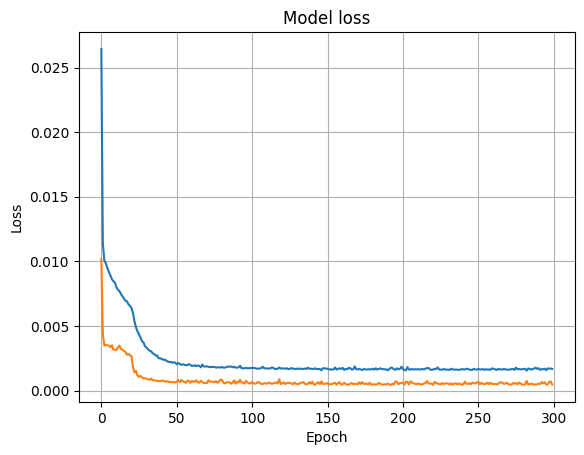

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[ 7.51391840e+00  1.26810993e+01  5.68105161e+00  4.26843083e+00
  3.28431988e+00  1.45894098e+00  2.36611034e+01  8.78666556e+00
  1.36448331e+01  5.68105161e+00  9.34304261e+00  8.99484050e+00
  2.17312586e+00  6.57114029e+00  2.72872424e+00  4.06875551e+00
 -8.96435976e-03 -1.93933964e-01 -1.31298602e-01  4.18090665e+00
  5.17976034e+00  9.03341234e-01  1.00986481e-01  6.55478537e-01
 -6.07526958e-01  1.79067576e+00  2.15737414e+00  2.99864757e+00
  2.30021304e+00  1.31610346e+00  2.01453662e+00  2.99864757e+00
 -1.93933964e-01 -8.93584490e-02  3.12597466e+00  4.01268542e+00
  5.17976034e+00  3.42716014e+00  3.14148647e+00  9.57517278e+00
 -1.93933964e-01 -1.93933964e-01 -1.93933964e-01 -4.32510138e-01
  4.29305506e+00  2.44304919e+00  2.15737414e+00 -3.02490592e-02
 -1.93933964e-01  7.35745132e-01  1.81380570e-01  3.63454819e-01
 -9.65186954e-02  1.03042841e+00 -5.09279549e-01 -6.07526958e-01
  3.63454819e-01 -4.34618592e-02  4.63188291e-02 -1.

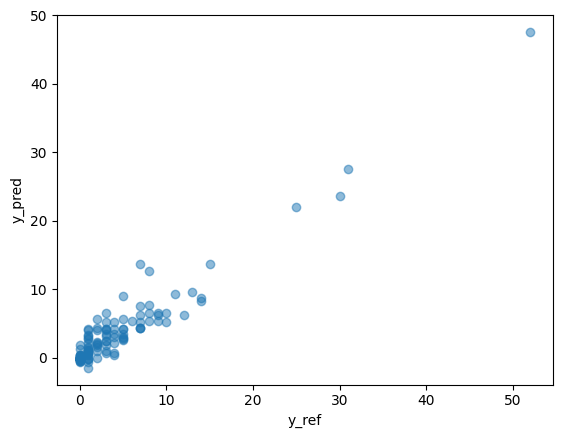

In [26]:
# 学習経過の表示
train_history.history.keys()
print(train_history.history)
len(train_history.history['loss'])

# 損失関数値のプロット
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

# 評価データによる推定と逆正規化
norm_y_pred = model.predict(x_test)
#print(norm_y_pred)
norm_xy_pred = np.hstack((x_test, norm_y_pred))
xy_pred = scaler.inverse_transform(norm_xy_pred)

# 最終的な推定値と正解値の表示
y_pred = xy_pred[:, 2]
y_ref = xy[304:440, 2]
print(y_pred)
print(y_ref)
fig, ax = plt.subplots()
ax.scatter(y_ref, y_pred, alpha=0.5)
ax.set_xlabel('y_ref')
ax.set_ylabel('y_pred')
plt.show()